# Basic usage of modified transformers library (modification have been done only for BERT)

## Install the changed library (only first once)

1. move into the modified library
> $ cd transformers

1. install using pip (I recommend editable mode (-e option).)
> $ pip install -e .

1. please install pytorch (https://pytorch.org/) \
 e.g., 
 > $ pip install torch torchvision

## Usage

In [1]:
import torch
from transformers import BertModel, BertTokenizer, RobertaModel, RobertaTokenizer, BartModel, BartTokenizer, BartConfig, T5Model, T5Tokenizer
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
# Load pretrained model/tokenizer
model_name = "t5-large"#"facebook/bart-large"#"bert-large-uncased-whole-word-masking"
#tokenizer = BertTokenizer.from_pretrained(model_name)
#model = BertModel.from_pretrained(model_name).to(device)
# tokenizer = RobertaTokenizer.from_pretrained(model_name)
# model = RobertaModel.from_pretrained(model_name).to(device)
# tokenizer = BartTokenizer.from_pretrained(model_name)
# model = BartModel.from_pretrained(model_name).to(device)
tokenizer = T5Tokenizer.from_pretrained(model_name)
tokenizer.mask_token = "<extra_id_0>"
model = T5Model.from_pretrained(model_name).to(device)
model.eval()

# Tokenize text and convert to ids. 
# input_ids = torch.tensor([tokenizer.encode("A 41 year old person age is [MASK] than a 42 year old person .", add_special_tokens=True)]).to(device)
input_ids = torch.tensor([tokenizer.encode(f"A 41 year old person age is {tokenizer.mask_token} than a 42 year old person .", add_special_tokens=True)]).to(device)
#input_ids = torch.tensor([tokenizer.encode("The size of a feather is usually much <mask> than the size of a nail .", add_special_tokens=True)]).to(device)
tokenized_text = tokenizer.convert_ids_to_tokens(input_ids[0])
print(tokenized_text)

Some weights of T5Model were not initialized from the model checkpoint at t5-large and are newly initialized: ['encoder.embed_tokens.weight', 'encoder.block.0.layer.0.output.dense.weight', 'encoder.block.0.layer.0.output.dense.bias', 'encoder.block.0.layer.0.output.LayerNorm.weight', 'encoder.block.1.layer.0.output.dense.weight', 'encoder.block.1.layer.0.output.dense.bias', 'encoder.block.1.layer.0.output.LayerNorm.weight', 'encoder.block.2.layer.0.output.dense.weight', 'encoder.block.2.layer.0.output.dense.bias', 'encoder.block.2.layer.0.output.LayerNorm.weight', 'encoder.block.3.layer.0.output.dense.weight', 'encoder.block.3.layer.0.output.dense.bias', 'encoder.block.3.layer.0.output.LayerNorm.weight', 'encoder.block.4.layer.0.output.dense.weight', 'encoder.block.4.layer.0.output.dense.bias', 'encoder.block.4.layer.0.output.LayerNorm.weight', 'encoder.block.5.layer.0.output.dense.weight', 'encoder.block.5.layer.0.output.dense.bias', 'encoder.block.5.layer.0.output.LayerNorm.weight', 

['▁A', '▁41', '▁year', '▁old', '▁person', '▁age', '▁is', '<extra_id_0>', '▁than', '▁', 'a', '▁42', '▁year', '▁old', '▁person', '▁', '.']


In [3]:
input_ids.repeat(2, 1).size()

torch.Size([2, 17])

In [4]:
from transformers import T5Config

In [5]:
T5Config.from_pretrained("t5-large")

T5Config {
  "architectures": [
    "T5WithLMHeadModel"
  ],
  "d_ff": 4096,
  "d_kv": 64,
  "d_model": 1024,
  "decoder_start_token_id": 0,
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_heads": 16,
  "num_layers": 24,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repeat_ngram_size": 3,
      "num_beams": 4,
      "prefix": "summarize: "
    },
    "translation_en_to_de": {
      "early_stopping": true,
      "max_length": 300,
      "num_beams": 4,
      "prefix": "translate English to German: "
    },
    "translation_en_to_fr": {
      "early_stopping": true,
      "max_length": 300,
      "num_beams": 4,
      "prefix": "translate English to 

In [3]:
# If you want to extract vector norms (i.e., ||f(x)||, ||αf(x)||, ||Σαf(x)||), please set the argument "output_norms" to True.
with torch.no_grad():
    #last_hidden_state, pooler_output, hidden_states, attentions, norms
#     decoder_features, decoder_states, decoder_attns, encoder_last_state, encoder_states, encoder_attns, norms = model(input_ids=input_ids.repeat(2, 1), output_hidden_states=True, output_attentions=True, output_norms=True)    
#     decoder_features, decoder_states, decoder_attns, decoder_self_norms, decoder_cross_norms, encoder_last_state, encoder_states, encoder_attns, encoder_norms = model(input_ids=input_ids, output_hidden_states=True, output_attentions=True, output_norms=True)
    decoder_features, decoder_cache, decoder_states, decoder_attns, decoder_self_norms, decoder_cross_norms, encoder_last_state, encoder_states, encoder_attns, encoder_norms = model(input_ids=input_ids, decoder_input_ids=input_ids, output_hidden_states=True, output_attentions=True, output_norms=True)  # T5

True
8
7
True
6
5
True
6
5
True
6
5
True
6
5
True
6
5
True
6
5
True
6
5
True
6
5
True
6
5
True
6
5
True
6
5
True
6
5
True
6
5
True
6
5
True
6
5
True
6
5
True
6
5
True
6
5
True
6
5
True
6
5
True
6
5
True
6
5
True
6
5


In [10]:
norms = decoder_cross_norms

In [11]:
num_heads = model.config.num_attention_heads
num_layers = model.config.num_hidden_layers
#fig, axes = plt.subplots(num_layers, num_heads)
#fig = plt.figure()
#fig.suptitle(f"BERT-Large-WWM Attention Norms")
fig = plt.figure() #plt.figure(figsize=(16, 12)) 
fig.set_figheight(120)
fig.set_figwidth(160)
#plt.rcParams["figure.figsize"] = (15 * num_layers, 15 * num_heads)
# num_layers = 6
for layer in tqdm(range(num_layers)):
    for head in range(num_heads):
        plt.subplot(num_heads, num_layers, num_layers * head + layer + 1)
        real_layer = layer
#         real_layer = layer if layer < 3 else layer + 18
#         if (layer == 0) or (layer == 23): #or ((layer in layer2head) and (head in layer2head[layer])):
#         afx_norm = norms[real_layer][0][1]  # bart encoder-self
        afx_norm = norms[real_layer][1]  # bart decoder-self, bart cross
        norm = afx_norm[0][head].cpu().numpy()
        df = pd.DataFrame(norm,columns=tokenized_text,index=tokenized_text)
        sns.heatmap(df,cmap="Reds",square=True)
        plt.gcf().subplots_adjust(bottom=0.2)
        
plt.savefig(f"t5-attention-cross-attention.png", bbox_inches="tight")
plt.close(fig)

  0%|          | 0/24 [00:00<?, ?it/s]

In [12]:
import time
time.sleep(30)

In [13]:
norms = encoder_norms
num_heads = model.config.num_attention_heads
num_layers = model.config.num_hidden_layers
#fig, axes = plt.subplots(num_layers, num_heads)
#fig = plt.figure()
#fig.suptitle(f"BERT-Large-WWM Attention Norms")
fig = plt.figure() #plt.figure(figsize=(16, 12)) 
fig.set_figheight(120)
fig.set_figwidth(160)
#plt.rcParams["figure.figsize"] = (15 * num_layers, 15 * num_heads)
# num_layers = 6
for layer in tqdm(range(num_layers)):
    for head in range(num_heads):
        plt.subplot(num_heads, num_layers, num_layers * head + layer + 1)
        real_layer = layer
#         real_layer = layer if layer < 3 else layer + 18
#         if (layer == 0) or (layer == 23): #or ((layer in layer2head) and (head in layer2head[layer])):
#         afx_norm = norms[real_layer][0][1]  # bart encoder-self
        afx_norm = norms[real_layer][1]  # bart decoder-self, bart cross
        norm = afx_norm[0][head].cpu().numpy()
        df = pd.DataFrame(norm,columns=tokenized_text,index=tokenized_text)
        sns.heatmap(df,cmap="Reds",square=True)
        plt.gcf().subplots_adjust(bottom=0.2)
        
    time.sleep(30)
        
plt.savefig(f"t5-encoder-self-attention.png", bbox_inches="tight")
plt.close(fig)

  0%|          | 0/24 [00:00<?, ?it/s]

In [14]:
time.sleep(30)

In [ ]:
norms = decoder_self_norms
num_heads = model.config.num_attention_heads
num_layers = model.config.num_hidden_layers
#fig, axes = plt.subplots(num_layers, num_heads)
#fig = plt.figure()
#fig.suptitle(f"BERT-Large-WWM Attention Norms")
fig = plt.figure() #plt.figure(figsize=(16, 12)) 
fig.set_figheight(120)
fig.set_figwidth(160)
#plt.rcParams["figure.figsize"] = (15 * num_layers, 15 * num_heads)
# num_layers = 6
for layer in tqdm(range(num_layers)):
    for head in range(num_heads):
        plt.subplot(num_heads, num_layers, num_layers * head + layer + 1)
        real_layer = layer
#         real_layer = layer if layer < 3 else layer + 18
#         if (layer == 0) or (layer == 23): #or ((layer in layer2head) and (head in layer2head[layer])):
#         afx_norm = norms[real_layer][0][1]  # bart encoder-self
        afx_norm = norms[real_layer][1]  # bart decoder-self, bart cross
        norm = afx_norm[0][head].cpu().numpy()
        df = pd.DataFrame(norm,columns=tokenized_text,index=tokenized_text)
        sns.heatmap(df,cmap="Reds",square=True)
        plt.gcf().subplots_adjust(bottom=0.2)
        
    time.sleep(30)
        
plt.savefig(f"t5-deccoder-self-attention.png", bbox_inches="tight")
plt.close(fig)

  0%|          | 0/24 [00:00<?, ?it/s]

In [7]:
# Returned variable "norms" is a tuple which has 12 elements (equal to the number of layers).
print(type(norms))
print(len(norms))

<class 'tuple'>
12


In [20]:
# Each element is a tuple which consists of 3 elements: ||f(x)||, ||αf(x)||, and ||Σαf(x)||.
layer = 5
print(type(norms[layer-1]))
print(len(norms[layer-1]))

# fx_norm, afx_norm, summed_afx_norm = norms[layer-1]
fx_norm, afx_norm, summed_afx_norm = norms[layer-1][0] # for BART

<class 'tuple'>
1


In [11]:
# shape of fx_norm (||f(x)||) is (batch, num_heads, seq_length)
print("shape of ||f(x)||:", fx_norm.size())

shape of ||f(x)||: torch.Size([1, 16, 17])


In [12]:
# shape of afx_norm (||αf(x)||) is (batch, num_heads, seq_length, seq_length)
print("shape of ||αf(x)||:", afx_norm.size())

shape of ||αf(x)||: torch.Size([1, 16, 17, 17])


In [13]:
# shape of summed_afx_norm (||Σαf(x)||) is (batch, seq_length, seq_length)
print("shape of ||Σαf(x)||:", summed_afx_norm.size())

shape of ||Σαf(x)||: torch.Size([1, 17, 17])


## Comparison with attention weight

In [13]:


# Set the layer and head you want to check. (layer: 1~12, head: 1~12)



### Attention weight visualization (Head-level visualization)

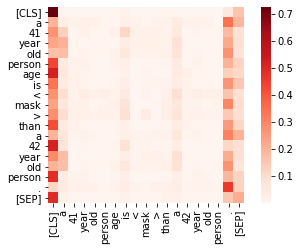

In [28]:
plt.figure() 
attention = attentions[layer-1][0][head-1].cpu().numpy()
df = pd.DataFrame(attention,columns=tokenized_text,index=tokenized_text)
sns.heatmap(df,cmap="Reds",square=True)
plt.gcf().subplots_adjust(bottom=0.2)

### Norm of the weighted vectors (||αf(x)||) visualization (Head-level visualization)

In [22]:
from tqdm.auto import tqdm

In [10]:
layer2head = {2: [2, 3], 3: [12], 5: [2], 6: [6], 12: [3], 13: [4], 15: [8], 16: [0, 8], 17: [2, 5, 10]}

In [25]:
num_heads = model.config.num_attention_heads
num_layers = model.config.num_hidden_layers
#fig, axes = plt.subplots(num_layers, num_heads)
#fig = plt.figure()
#fig.suptitle(f"BERT-Large-WWM Attention Norms")
fig = plt.figure() #plt.figure(figsize=(16, 12)) 
fig.set_figheight(120)
fig.set_figwidth(160)
#plt.rcParams["figure.figsize"] = (15 * num_layers, 15 * num_heads)
for layer in tqdm(range(num_layers)):
    for head in range(num_heads):
        plt.subplot(num_heads, num_layers, num_layers * head + layer + 1)
        if (layer == 0) or (layer == 23): #or ((layer in layer2head) and (head in layer2head[layer])):
            afx_norm = norms[layer][1]
            norm = afx_norm[0][head].cpu().numpy()
            df = pd.DataFrame(norm,columns=tokenized_text,index=tokenized_text)
            sns.heatmap(df,cmap="Reds",square=True)
            plt.gcf().subplots_adjust(bottom=0.2)
        
plt.savefig(f"{model_name}-attention-important_all.png", bbox_inches="tight")
plt.close(fig)

  0%|          | 0/12 [00:00<?, ?it/s]

IndexError: tuple index out of range

Error in callback <function flush_figures at 0x13b84dd40> (for post_execute):


KeyboardInterrupt: 

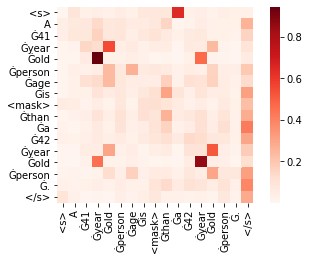

In [21]:
layer = 1
head = 1
plt.figure() 
afx_norm = norms[layer-1][0][1]  # BART
norm = afx_norm[0][head-1].cpu().numpy()
df = pd.DataFrame(norm,columns=tokenized_text,index=tokenized_text)
sns.heatmap(df,cmap="Reds",square=True)
plt.gcf().subplots_adjust(bottom=0.2)

In [14]:
layer = 1
head = 1
plt.figure() 
afx_norm = norms[layer-1][1]
norm = afx_norm[0][head-1].cpu().numpy()
df = pd.DataFrame(norm,columns=tokenized_text,index=tokenized_text)
sns.heatmap(df,cmap="Reds",square=True)
plt.gcf().subplots_adjust(bottom=0.2)

IndexError: tuple index out of range

<Figure size 432x288 with 0 Axes>

### Attention weight visualization (Layer-level visualization)

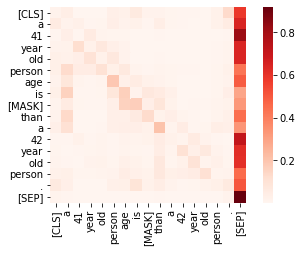

In [12]:
plt.figure() 
attention = attentions[layer-1][0].mean(0).cpu().numpy()
df = pd.DataFrame(attention,columns=tokenized_text,index=tokenized_text)
sns.heatmap(df,cmap="Reds",square=True)
plt.gcf().subplots_adjust(bottom=0.2)

### Norm of the summed weighted vectors (||Σ αf(x)||) visualization (Layer-level visualization)

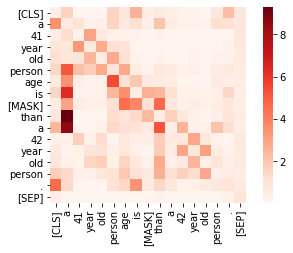

In [13]:
plt.figure() 
summed_afx_norm = norms[layer-1][2]
norm = summed_afx_norm[0].cpu().numpy()
df = pd.DataFrame(norm,columns=tokenized_text,index=tokenized_text)
sns.heatmap(df,cmap="Reds",square=True)
plt.gcf().subplots_adjust(bottom=0.2)